<a href="https://colab.research.google.com/github/saipragna25/pragna/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 14.7 MB/s 
     |████████████████████████████████| 1.7 MB 54.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 134 kB 75.8 MB/s 
     |████████████████████████████████| 88 kB 8.0 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 2.0 MB 57.1 MB/s 
     |████████████████████████████████| 268 kB 80.8 MB/s 
     |████████████████████████████████| 17.0 MB 71.1 MB/s 
     |████████████████████████████████| 3.3 MB 53.4 MB/s 
     |████████████████████████████████| 6.8 MB 67.3 MB/s 
     |████████████████████████████████| 1.3 MB 58.2 MB/s 
     |████████████████████████████████| 56 kB 5.3 MB/s 
     |████████████████████████████████|

In [1]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [2]:
from pycaret.classification import *

In [7]:
from google.colab import files
uploaded = files.upload()

Saving incomebc.csv to incomebc.csv


In [8]:
import pandas as pd
dataset=pd.read_csv('incomebc.csv')
dataset.head()

age  workclass  fnlwgt     education  educational-num      marital-status  \
0   67    Private  366425     Doctorate               16            Divorced   
1   17    Private  244602          12th                8       Never-married   
2   31    Private  174201     Bachelors               13  Married-civ-spouse   
3   58  State-gov  110199       7th-8th                4  Married-civ-spouse   
4   25  State-gov  149248  Some-college               10       Never-married   

         occupation   relationship   race gender  capital-gain  capital-loss  \
0   Exec-managerial  Not-in-family  White   Male         99999             0   
1     Other-service      Own-child  White   Male             0             0   
2   Exec-managerial        Husband  White   Male             0             0   
3  Transport-moving        Husband  White   Male             0             0   
4     Other-service  Not-in-family  Black   Male             0             0   

   hours-per-week native-country  income_>50K  
0              60  United-States            1  
1              15  United-States            0  
2              40  United-States            1  
3              40  United-States            0  
4              40  United-States            0

In [9]:
#check the shape of data
dataset.shape

(43957, 15)

In [10]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (41759, 15)
Unseen Data For Predictions: (2198, 15)


In [12]:
exp_clf102 = setup(data = data, target = 'income_>50K', session_id=123,
                  normalize = True, 
                  transformation = True, 
                  ignore_low_variance = True,
                  remove_multicollinearity = True, multicollinearity_threshold = 0.95)

Description             Value
0                               session_id               123
1                                   Target       income_>50K
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data       (41759, 15)
5                           Missing Values              True
6                         Numeric Features                 5
7                     Categorical Features                 9
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set       (29231, 61)
12                    Transformed Test Set       (12528, 61)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              e0eb
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation              True
32                   Transformation Method       yeo-johnson
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance              True
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity              True
43             Multicollinearity Threshold              0.95
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[],
                                      target='income_>50K', time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_...
                ('dummy', Dummify(target='income_>50K')),
                ('fix_perfect', Remove_100(target='income_>50K')),
                ('clean_names', Clean_Colum_Names

In [13]:
top3 = compare_models(n_select = 3)

Model  Accuracy     AUC  Recall   Prec.  \
lightgbm  Light Gradient Boosting Machine    0.8423  0.8935  0.5907  0.7044   
gbc          Gradient Boosting Classifier    0.8410  0.8918  0.5441  0.7252   
ada                  Ada Boost Classifier    0.8369  0.8898  0.5649  0.6980   
lr                    Logistic Regression    0.8348  0.8878  0.5588  0.6938   
lda          Linear Discriminant Analysis    0.8334  0.8817  0.5552  0.6904   
svm                   SVM - Linear Kernel    0.8331  0.0000  0.5374  0.7016   
ridge                    Ridge Classifier    0.8330  0.0000  0.4972  0.7210   
rf               Random Forest Classifier    0.8292  0.8747  0.5668  0.6707   
et                 Extra Trees Classifier    0.8165  0.8581  0.5678  0.6309   
knn                K Neighbors Classifier    0.8161  0.8416  0.5790  0.6264   
dt               Decision Tree Classifier    0.7795  0.7001  0.5471  0.5403   
dummy                    Dummy Classifier    0.7599  0.5000  0.0000  0.0000   
qda       Quadratic Discriminant Analysis    0.7201  0.5488  0.2192  0.3557   
nb                            Naive Bayes    0.6629  0.8485  0.9011  0.4085   

              F1   Kappa     MCC  TT (Sec)  
lightgbm  0.6425  0.5423  0.5458     0.416  
gbc       0.6216  0.5236  0.5323     4.266  
ada       0.6244  0.5217  0.5265     1.092  
lr        0.6189  0.5150  0.5200     1.524  
lda       0.6153  0.5106  0.5156     0.336  
svm       0.6057  0.5026  0.5115     0.224  
ridge     0.5884  0.4881  0.5014     0.046  
rf        0.6143  0.5056  0.5086     3.195  
et        0.5976  0.4791  0.4803     3.404  
knn       0.6017  0.4824  0.4831     7.557  
dt        0.5436  0.3982  0.3983     0.222  
dummy     0.0000  0.0000  0.0000     0.039  
qda       0.2685  0.1106  0.1152     0.162  
nb        0.5621  0.3460  0.4183     0.056

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.

In [14]:
type(top3)

list

In [15]:
print(top3)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                      

In [16]:
dt = create_model('dt', fold = 5)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7831  0.7073  0.5605  0.5473  0.5538  0.4106  0.4107
1       0.7805  0.7035  0.5552  0.5417  0.5484  0.4035  0.4035
2       0.7819  0.7106  0.5716  0.5434  0.5571  0.4126  0.4128
3       0.7757  0.6935  0.5353  0.5326  0.5339  0.3863  0.3863
4       0.7829  0.7024  0.5477  0.5481  0.5479  0.4051  0.4051
Mean    0.7808  0.7035  0.5541  0.5426  0.5482  0.4036  0.4037
Std     0.0027  0.0058  0.0122  0.0055  0.0079  0.0093  0.0093

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [17]:
rf = create_model('rf', round = 2)

Accuracy   AUC  Recall  Prec.    F1  Kappa   MCC
Fold                                                  
0         0.83  0.88    0.59   0.67  0.63   0.52  0.52
1         0.83  0.88    0.57   0.66  0.61   0.50  0.50
2         0.83  0.88    0.58   0.68  0.63   0.52  0.52
3         0.83  0.87    0.56   0.68  0.62   0.51  0.52
4         0.83  0.88    0.57   0.67  0.62   0.51  0.51
5         0.83  0.86    0.54   0.67  0.60   0.49  0.49
6         0.82  0.86    0.55   0.65  0.59   0.48  0.48
7         0.83  0.87    0.57   0.66  0.61   0.50  0.50
8         0.84  0.88    0.58   0.69  0.63   0.53  0.53
9         0.83  0.88    0.56   0.67  0.61   0.50  0.50
Mean      0.83  0.87    0.57   0.67  0.61   0.51  0.51
Std       0.00  0.01    0.01   0.01  0.01   0.01  0.01

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [18]:
tuned_rf = tune_model(rf, optimize = 'AUC')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7302  0.8819  0.8661  0.4666  0.6065  0.4280  0.4755
1       0.7301  0.8770  0.8787  0.4667  0.6096  0.4315  0.4821
2       0.7225  0.8658  0.8288  0.4568  0.5890  0.4049  0.4460
3       0.7202  0.8690  0.8531  0.4554  0.5938  0.4091  0.4561
4       0.7335  0.8731  0.8761  0.4705  0.6122  0.4360  0.4850
5       0.7164  0.8576  0.8476  0.4518  0.5894  0.4021  0.4486
6       0.7243  0.8566  0.8291  0.4590  0.5909  0.4078  0.4484
7       0.7164  0.8550  0.8362  0.4512  0.5861  0.3984  0.4424
8       0.7366  0.8786  0.8419  0.4728  0.6055  0.4303  0.4707
9       0.7362  0.8740  0.8519  0.4727  0.6080  0.4328  0.4755
Mean    0.7266  0.8688  0.8509  0.4624  0.5991  0.4181  0.4630
Std     0.0073  0.0092  0.0171  0.0080  0.0096  0.0140  0.0155

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.001,
                       min_impurity_split=None, min_samples_leaf=6,
                       min_samples_split=9, min_weight_fraction_leaf=0.0,
                       n_estimators=190, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [19]:
tuned_rf2 = tune_model(rf, optimize = 'Recall')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7370  0.8663  0.9031  0.4749  0.6225  0.4491  0.5039
1       0.7468  0.8493  0.8902  0.4848  0.6278  0.4601  0.5090
2       0.7321  0.8554  0.8716  0.4686  0.6095  0.4324  0.4808
3       0.7236  0.8469  0.8802  0.4601  0.6043  0.4224  0.4750
4       0.7373  0.8607  0.8875  0.4748  0.6187  0.4450  0.4958
5       0.7239  0.8423  0.8048  0.4575  0.5834  0.3995  0.4352
6       0.7342  0.8500  0.8590  0.4707  0.6082  0.4319  0.4767
7       0.7325  0.8527  0.8618  0.4690  0.6074  0.4302  0.4761
8       0.7530  0.8591  0.8832  0.4921  0.6320  0.4679  0.5133
9       0.7451  0.8695  0.8989  0.4835  0.6288  0.4602  0.5116
Mean    0.7365  0.8552  0.8740  0.4736  0.6142  0.4399  0.4877
Std     0.0091  0.0082  0.0268  0.0103  0.0140  0.0197  0.0229

INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=7, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=-1, oob_score=False,
                       random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [20]:
plot_model(tuned_rf, plot = 'parameter')

Parameters
bootstrap                              False
ccp_alpha                                0.0
class_weight              balanced_subsample
criterion                               gini
max_depth                                  6
max_features                            log2
max_leaf_nodes                          None
max_samples                             None
min_impurity_decrease                  0.001
min_impurity_split                      None
min_samples_leaf                           6
min_samples_split                          9
min_weight_fraction_leaf                 0.0
n_estimators                             190
n_jobs                                    -1
oob_score                              False
random_state                             123
verbose                                    0
warm_start                             False

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [21]:
plot_model(tuned_rf2, plot = 'parameter')

Parameters
bootstrap                              False
ccp_alpha                                0.0
class_weight              balanced_subsample
criterion                               gini
max_depth                                  6
max_features                             1.0
max_leaf_nodes                          None
max_samples                             None
min_impurity_decrease                      0
min_impurity_split                      None
min_samples_leaf                           4
min_samples_split                          7
min_weight_fraction_leaf                 0.0
n_estimators                             200
n_jobs                                    -1
oob_score                              False
random_state                             123
verbose                                    0
warm_start                             False

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [22]:
# lets create a simple decision tree model that we will use for ensembling 
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.7897  0.7145  0.5698  0.5610  0.5654  0.4266  0.4267
1       0.7817  0.7013  0.5449  0.5449  0.5449  0.4014  0.4014
2       0.7800  0.6947  0.5307  0.5423  0.5364  0.3922  0.3923
3       0.7776  0.6975  0.5435  0.5359  0.5397  0.3931  0.3931
4       0.7838  0.7067  0.5584  0.5490  0.5537  0.4110  0.4110
5       0.7691  0.6835  0.5171  0.5193  0.5182  0.3663  0.3663
6       0.7845  0.7013  0.5413  0.5523  0.5468  0.4054  0.4054
7       0.7694  0.6968  0.5570  0.5186  0.5371  0.3838  0.3843
8       0.7828  0.7045  0.5541  0.5471  0.5506  0.4074  0.4074
9       0.7763  0.7003  0.5541  0.5329  0.5433  0.3952  0.3953
Mean    0.7795  0.7001  0.5471  0.5403  0.5436  0.3982  0.3983
Std     0.0062  0.0077  0.0144  0.0131  0.0118  0.0155  0.0155

INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [23]:
bagged_dt = ensemble_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8211  0.8607  0.5399  0.6546  0.5917  0.4786  0.4822
1       0.8190  0.8408  0.5021  0.6617  0.5710  0.4590  0.4660
2       0.8207  0.8403  0.5335  0.6550  0.5881  0.4750  0.4791
3       0.8200  0.8516  0.5193  0.6582  0.5805  0.4680  0.4734
4       0.8173  0.8484  0.5100  0.6533  0.5728  0.4588  0.4645
5       0.8170  0.8356  0.5028  0.6549  0.5689  0.4553  0.4617
6       0.8098  0.8302  0.4829  0.6372  0.5494  0.4318  0.4384
7       0.8122  0.8408  0.5256  0.6308  0.5734  0.4543  0.4574
8       0.8204  0.8561  0.5114  0.6636  0.5776  0.4660  0.4724
9       0.8159  0.8473  0.4929  0.6553  0.5626  0.4490  0.4563
Mean    0.8174  0.8452  0.5120  0.6525  0.5736  0.4596  0.4651
Std     0.0036  0.0089  0.0170  0.0098  0.0116  0.0128  0.0121

INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [24]:
# check the parameters of bagged_dt
print(bagged_dt)

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=123,
 

In [25]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8044  0.8324  0.4088  0.6464  0.5009  0.3868  0.4025
1       0.7937  0.7990  0.4194  0.6000  0.4937  0.3692  0.3786
2       0.7930  0.8000  0.3994  0.6034  0.4807  0.3581  0.3699
3       0.7759  0.7926  0.5007  0.5351  0.5173  0.3716  0.3720
4       0.7978  0.8104  0.4031  0.6220  0.4892  0.3702  0.3838
5       0.7917  0.7961  0.4103  0.5963  0.4861  0.3610  0.3709
6       0.7817  0.6990  0.5399  0.5461  0.5430  0.3996  0.3996
7       0.7947  0.8083  0.4701  0.5914  0.5238  0.3951  0.3994
8       0.8098  0.8493  0.4658  0.6437  0.5405  0.4244  0.4333
9       0.7595  0.7727  0.4630  0.4992  0.4804  0.3242  0.3246
Mean    0.7902  0.7960  0.4481  0.5884  0.5056  0.3760  0.3835
Std     0.0138  0.0381  0.0452  0.0453  0.0227  0.0259  0.0270

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fracti

In [26]:
bagged_dt2 = ensemble_model(dt, n_estimators=50)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8259  0.8788  0.5869  0.6529  0.6182  0.5058  0.5070
1       0.8235  0.8694  0.5464  0.6592  0.5975  0.4857  0.4892
2       0.8245  0.8663  0.5592  0.6577  0.6045  0.4926  0.4953
3       0.8269  0.8668  0.5606  0.6650  0.6084  0.4983  0.5013
4       0.8272  0.8765  0.5670  0.6644  0.6118  0.5016  0.5042
5       0.8269  0.8517  0.5670  0.6633  0.6114  0.5009  0.5034
6       0.8166  0.8498  0.5385  0.6407  0.5851  0.4686  0.4715
7       0.8255  0.8628  0.5684  0.6584  0.6101  0.4985  0.5007
8       0.8248  0.8784  0.5684  0.6562  0.6092  0.4970  0.4992
9       0.8255  0.8714  0.5598  0.6616  0.6065  0.4954  0.4982
Mean    0.8247  0.8672  0.5622  0.6580  0.6063  0.4944  0.4970
Std     0.0029  0.0096  0.0125  0.0068  0.0087  0.0101  0.0097

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                     

In [27]:
# train individual models to blend
lightgbm = create_model('lightgbm', verbose = False)
dt = create_model('dt', verbose = False)
lr = create_model('lr', verbose = False)

INFO:logs:Initializing create_model()
INFO:logs:create_model(estimator=lightgbm, fold=None, round=4, cross_validation=True, predict=True, fit_kwargs=None, groups=None, refit=True, verbose=False, system=True, metrics=None, experiment_custom_tags=None, add_to_model_list=True, probability_threshold=None, display=None, return_train_score=False, kwargs={})
INFO:logs:Checking exceptions
INFO:logs:Importing libraries
INFO:logs:Copying training dataset
INFO:logs:Defining folds
INFO:logs:Declaring metric variables
INFO:logs:Importing untrained model
INFO:logs:Light Gradient Boosting Machine Imported succesfully
INFO:logs:Starting cross validation
INFO:logs:Cross validating with StratifiedKFold(n_splits=10, random_state=None, shuffle=False), n_jobs=-1
INFO:logs:Calculating mean and std
INFO:logs:Creating metrics dataframe
INFO:logs:Finalizing model
INFO:logs:Uploading results into container
INFO:logs:Uploading model into container now
INFO:logs:create_model_container: 23
INFO:logs:master_model_c

In [28]:
# blend individual models
blend_soft = blend_models(estimator_list = [lightgbm, dt, lr], method = 'soft')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8317  0.8879  0.5997  0.6661  0.6312  0.5226  0.5238
1       0.8177  0.8819  0.5592  0.6364  0.5953  0.4782  0.4799
2       0.8166  0.8810  0.5464  0.6373  0.5883  0.4713  0.4736
3       0.8156  0.8750  0.5706  0.6270  0.5975  0.4782  0.4791
4       0.8259  0.8807  0.5855  0.6534  0.6176  0.5053  0.5066
5       0.8094  0.8617  0.5356  0.6194  0.5745  0.4525  0.4545
6       0.8146  0.8718  0.5556  0.6290  0.5900  0.4708  0.4723
7       0.8142  0.8693  0.5783  0.6217  0.5993  0.4786  0.4791
8       0.8170  0.8851  0.5726  0.6311  0.6004  0.4821  0.4831
9       0.8149  0.8823  0.5570  0.6296  0.5911  0.4720  0.4735
Mean    0.8178  0.8777  0.5661  0.6351  0.5985  0.4812  0.4825
Std     0.0061  0.0077  0.0181  0.0137  0.0150  0.0185  0.0183

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [29]:
# blend individual models
blend_hard = blend_models(estimator_list = [lightgbm, dt, lr], method = 'hard')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                       
0       0.8434  0.0  0.5926  0.7075  0.6450  0.5455  0.5490
1       0.8399  0.0  0.5621  0.7099  0.6274  0.5272  0.5330
2       0.8382  0.0  0.5706  0.6993  0.6284  0.5264  0.5308
3       0.8389  0.0  0.5678  0.7032  0.6283  0.5269  0.5318
4       0.8395  0.0  0.5826  0.6991  0.6356  0.5338  0.5374
5       0.8337  0.0  0.5527  0.6929  0.6149  0.5106  0.5159
6       0.8368  0.0  0.5641  0.6984  0.6241  0.5214  0.5262
7       0.8358  0.0  0.5783  0.6881  0.6285  0.5241  0.5274
8       0.8433  0.0  0.5883  0.7096  0.6433  0.5440  0.5480
9       0.8409  0.0  0.5840  0.7033  0.6381  0.5373  0.5411
Mean    0.8390  0.0  0.5743  0.7011  0.6314  0.5297  0.5341
Std     0.0029  0.0  0.0122  0.0067  0.0087  0.0101  0.0096

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [30]:
# blend top3 models from compare_models
blender_top3 = blend_models(top3)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8492  0.9061  0.5840  0.7335  0.6503  0.5557  0.5616
1       0.8481  0.8997  0.5806  0.7307  0.6471  0.5519  0.5578
2       0.8416  0.8958  0.5678  0.7133  0.6322  0.5330  0.5386
3       0.8457  0.8921  0.5578  0.7350  0.6342  0.5388  0.5470
4       0.8372  0.8953  0.5584  0.7025  0.6222  0.5202  0.5257
5       0.8406  0.8794  0.5527  0.7185  0.6248  0.5258  0.5331
6       0.8402  0.8826  0.5570  0.7148  0.6261  0.5265  0.5331
7       0.8375  0.8888  0.5556  0.7052  0.6215  0.5199  0.5259
8       0.8498  0.9036  0.5826  0.7369  0.6508  0.5568  0.5630
9       0.8430  0.9005  0.5670  0.7197  0.6343  0.5361  0.5423
Mean    0.8433  0.8944  0.5663  0.7210  0.6343  0.5364  0.5428
Std     0.0044  0.0083  0.0114  0.0118  0.0108  0.0134  0.0134

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=123, reg_alpha=0.0,
                                             reg_lambda=0.0, silent

In [31]:
print(blender_top3.estimators_)

[LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0), GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                      

In [32]:
stack_soft = stack_models(top3)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8464  0.9007  0.6011  0.7140  0.6527  0.5551  0.5585
1       0.8440  0.8970  0.5934  0.7087  0.6460  0.5469  0.5505
2       0.8392  0.8972  0.5877  0.6948  0.6368  0.5345  0.5375
3       0.8467  0.8926  0.5792  0.7263  0.6444  0.5483  0.5540
4       0.8385  0.8955  0.5883  0.6930  0.6364  0.5335  0.5364
5       0.8365  0.8794  0.5627  0.6979  0.6230  0.5201  0.5251
6       0.8392  0.8837  0.5712  0.7035  0.6305  0.5292  0.5338
7       0.8368  0.8863  0.5755  0.6930  0.6288  0.5254  0.5291
8       0.8491  0.9014  0.5926  0.7285  0.6536  0.5584  0.5633
9       0.8440  0.8995  0.5926  0.7099  0.6460  0.5470  0.5506
Mean    0.8421  0.8933  0.5844  0.7070  0.6398  0.5398  0.5439
Std     0.0043  0.0073  0.0113  0.0124  0.0098  0.0124  0.0125

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:StackingClassifier(cv=5,
                   estimators=[('lightgbm',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=100, n_jobs=-1,
                                               num_leaves=31, objective=None,
                                               random_state=123, reg_alpha=0.0,
                  

In [34]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8321  0.8811  0.5883  0.6715  0.6272  0.5194  0.5213
1       0.8265  0.8793  0.5663  0.6617  0.6103  0.4996  0.5021
2       0.8341  0.8822  0.5835  0.6794  0.6278  0.5218  0.5243
3       0.8327  0.8741  0.5635  0.6834  0.6177  0.5119  0.5158
4       0.8303  0.8813  0.5698  0.6734  0.6173  0.5092  0.5122
5       0.8255  0.8611  0.5385  0.6702  0.5972  0.4875  0.4922
6       0.8190  0.8616  0.5470  0.6454  0.5921  0.4769  0.4796
7       0.8265  0.8665  0.5698  0.6612  0.6121  0.5012  0.5035
8       0.8368  0.8837  0.5812  0.6904  0.6311  0.5273  0.5305
9       0.8283  0.8763  0.5598  0.6706  0.6102  0.5013  0.5046
Mean    0.8292  0.8747  0.5668  0.6707  0.6143  0.5056  0.5086
Std     0.0049  0.0082  0.0149  0.0120  0.0121  0.0149  0.0147

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


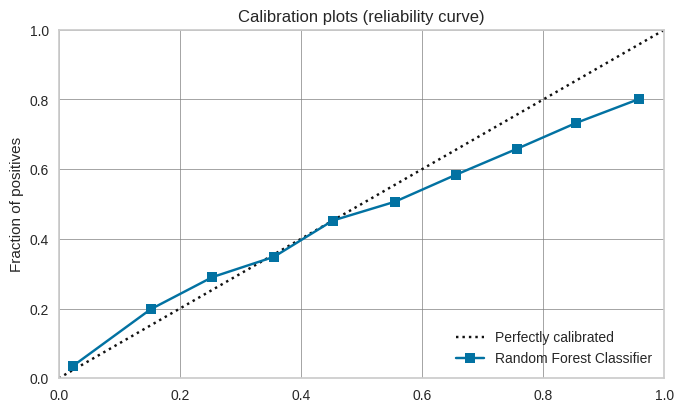

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [35]:
plot_model(rf, plot='calibration')

In [36]:
calibrated_rf = calibrate_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8358  0.8884  0.5499  0.7018  0.6166  0.5141  0.5203
1       0.8276  0.8855  0.5207  0.6848  0.5916  0.4848  0.4922
2       0.8344  0.8851  0.5292  0.7067  0.6052  0.5032  0.5116
3       0.8320  0.8789  0.5078  0.7092  0.5919  0.4897  0.5005
4       0.8317  0.8881  0.5328  0.6952  0.6032  0.4988  0.5059
5       0.8330  0.8690  0.5043  0.7166  0.5920  0.4910  0.5030
6       0.8262  0.8676  0.5014  0.6902  0.5809  0.4747  0.4843
7       0.8269  0.8724  0.5214  0.6828  0.5913  0.4840  0.4910
8       0.8409  0.8899  0.5313  0.7328  0.6160  0.5189  0.5296
9       0.8289  0.8824  0.5214  0.6906  0.5942  0.4885  0.4962
Mean    0.8318  0.8807  0.5220  0.7011  0.5983  0.4948  0.5035
Std     0.0044  0.0079  0.0140  0.0149  0.0110  0.0132  0.0132

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

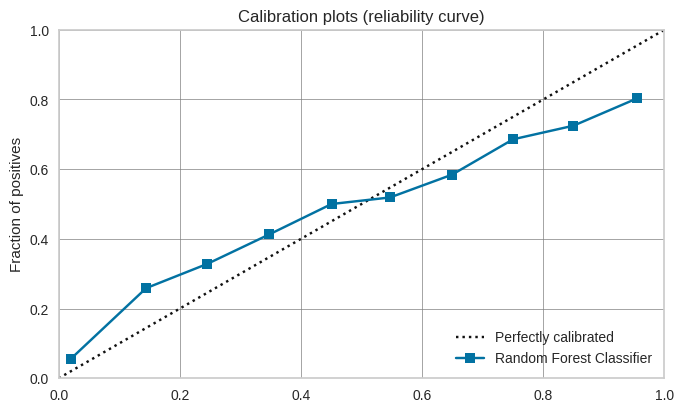

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [37]:
plot_model(calibrated_rf, plot='calibration')


In [38]:
calibrated_rf_isotonic = calibrate_model(rf, method = 'isotonic')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Fold                                                          
0       0.8376  0.8884  0.5712  0.6974  0.6280  0.5254  0.5297
1       0.8265  0.8847  0.5378  0.6732  0.5979  0.4891  0.4941
2       0.8361  0.8850  0.5592  0.6975  0.6207  0.5178  0.5230
3       0.8324  0.8788  0.5307  0.6979  0.6029  0.4992  0.5067
4       0.8320  0.8881  0.5442  0.6908  0.6088  0.5037  0.5095
5       0.8327  0.8691  0.5313  0.6998  0.6040  0.5005  0.5081
6       0.8269  0.8672  0.5299  0.6788  0.5952  0.4872  0.4933
7       0.8276  0.8719  0.5442  0.6749  0.6025  0.4940  0.4987
8       0.8430  0.8898  0.5755  0.7150  0.6377  0.5390  0.5442
9       0.8303  0.8815  0.5399  0.6866  0.6045  0.4984  0.5042
Mean    0.8325  0.8805  0.5464  0.6912  0.6102  0.5054  0.5112
Std     0.0049  0.0079  0.0158  0.0124  0.0132  0.0159  0.0155

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:CalibratedClassifierCV(base_estimator=RandomForestClassifier(bootstrap=True,
                                                             ccp_alpha=0.0,
                                                             class_weight=None,
                                                             criterion='gini',
                                                             max_depth=None,
                                                             max_features='auto',
                                                             max_leaf_nodes=None,
                                                             max_samples=None,
                                                             min_impurity_decrease=0.0,
                                                             min_impurity_split=None,
                                                             min_samples_leaf=

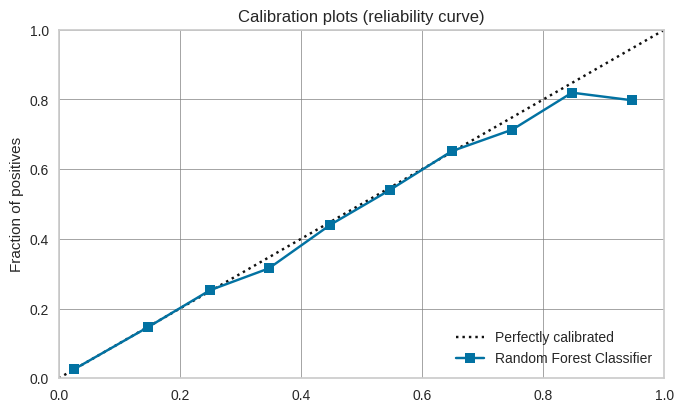

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [39]:
plot_model(calibrated_rf_isotonic, plot='calibration')

In [41]:
# to start the MLFlow server from notebook:
!mlflow ui 

[2022-09-09 04:50:15 +0000] [10683] [INFO] Starting gunicorn 20.1.0
[2022-09-09 04:50:15 +0000] [10683] [INFO] Listening at: http://127.0.0.1:5000 (10683)
[2022-09-09 04:50:15 +0000] [10683] [INFO] Using worker: sync
[2022-09-09 04:50:15 +0000] [10686] [INFO] Booting worker with pid: 10686
[2022-09-09 04:52:09 +0000] [10683] [INFO] Handling signal: int

Aborted!
[2022-09-09 04:52:09 +0000] [10686] [INFO] Worker exiting (pid: 10686)
[2022-09-09 04:52:09 +0000] [10683] [INFO] Shutting down: Master
